In [22]:
import numpy as np # Para las operaciones de algebra lineal
import pandas as pd # para el procesamiento de datos ya que utilizaremos formato CSV
import matplotlib.pyplot as plt # para el caso de las graficas

In [23]:
data = pd.read_csv('recursos_humanos.csv') # Cargamos el archivo en un dataframe y lo guardamos en la variable data
data # mostramos el dataframe

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [24]:
data.columns # mostramos las columnas del dataframe

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [25]:
data.info() # Aqui corroboramos que las variables sales y salary son las dos unicas con valores CUALITATIVOS
# tambien confirmamos que todas las columnas tienen los mimos numeros de renglones lo que mos facilita el analisis exploratorio 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [26]:
# Valores únicos de la columna 'sales'
valores_sales = data['sales'].unique()
print("Valores únicos de 'sales':", valores_sales)

# Valores únicos de la columna 'salary'
valores_salary = data['salary'].unique()
print("Valores únicos de 'salary':", valores_salary)

Valores únicos de 'sales': ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
Valores únicos de 'salary': ['low' 'medium' 'high']


In [27]:
data.drop(['sales', 'salary'], axis = 1, inplace=True) # axis=1 indica que se eliminaron columnas 
# Inplace=True indica que se elimina directamente del dataframe
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [28]:
# Confirmamos que los valores de Left son '0' Y '1'
valores_left = data['left'].unique()
print("Valores únicos de 'left':", valores_left)

Valores únicos de 'left': [1 0]


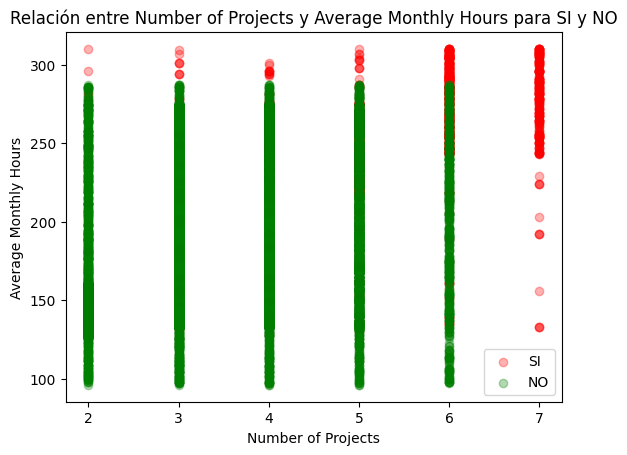

In [29]:
SI = data[data.left == 1] # Seleccionamos los datos de la columna left que sean iguales a 1
NO = data[data.left == 0] # Seleccionamos los datos de la columna left que sean iguales a 0
# Diagrama de dispersión para la variable SI
plt.scatter(SI.number_project, SI.average_montly_hours, color='red', label='SI', alpha=0.3)

# Diagrama de dispersión para la variable NO
plt.scatter(NO.number_project, NO.average_montly_hours, color='green', label='NO', alpha=0.3)

plt.xlabel('Number of Projects')
plt.ylabel('Average Monthly Hours')
plt.title('Relación entre Number of Projects y Average Monthly Hours para SI y NO')
plt.legend()
plt.show()

In [30]:
y = data.left.values # Guardamos los valores de la columna left en la variable Y
x_data = data.drop(['left'], axis = 1) # Eliminamos la columna left y guardamos el resto de los datos en x_data

In [31]:
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [32]:
x_data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0
14995,0.37,0.48,2,160,3,0,0
14996,0.37,0.53,2,143,3,0,0
14997,0.11,0.96,6,280,4,0,0


In [33]:
# Normalizacion de los datos 
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)) 
x

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.001226,0.001710,0.006452,0.506452,0.009677,0.0,0.0
1,0.002581,0.002774,0.016129,0.845161,0.019355,0.0,0.0
2,0.000355,0.002839,0.022581,0.877419,0.012903,0.0,0.0
3,0.002323,0.002806,0.016129,0.719355,0.016129,0.0,0.0
4,0.001194,0.001677,0.006452,0.512903,0.009677,0.0,0.0
...,...,...,...,...,...,...,...
14994,0.001290,0.001839,0.006452,0.487097,0.009677,0.0,0.0
14995,0.001194,0.001548,0.006452,0.516129,0.009677,0.0,0.0
14996,0.001194,0.001710,0.006452,0.461290,0.009677,0.0,0.0
14997,0.000355,0.003097,0.019355,0.903226,0.012903,0.0,0.0


In [34]:
# Bases de entrenamiento y prueba
from sklearn.model_selection import train_test_split # importamos la libreria para dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=1)

MODELO KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier # importamos el clasificado KNN
knn = KNeighborsClassifier(n_neighbors=3) # Creamos el clasificador con 3 vec
knn.fit(X_train, y_train) # Entrenamos el clasificador
prediction = knn.predict(X_test) # Realizamos la prediccion con los datos de prueba
print('Score: ', knn.score(X_test, y_test)) # Mostramos el score del clasificador

Score:  0.9497777777777778


In [36]:
y_pred = prediction # Guardamos la prediccion en la variable y_pred
y_true = y_test # Guardamos los valores reales en la variable y_true

In [37]:
from sklearn.metrics import confusion_matrix # Importamos la matriz de confusion
# Crear la matriz de confusión
cm = confusion_matrix(y_true, y_pred) # Guardamos la matriz de confusion en la variable cm
# Mostrar la matriz de confusión
cm # mostramos la matriz de confusion
# recordemos que los valores en diagonal de derecha a izquierda de arriba hacia abajo son los valores bine pronosticados
# Y los valores en digonal de izquierda a derecha de abajo hacia arriba son los valores mal pronosticados

array([[3258,  158],
       [  68, 1016]], dtype=int64)

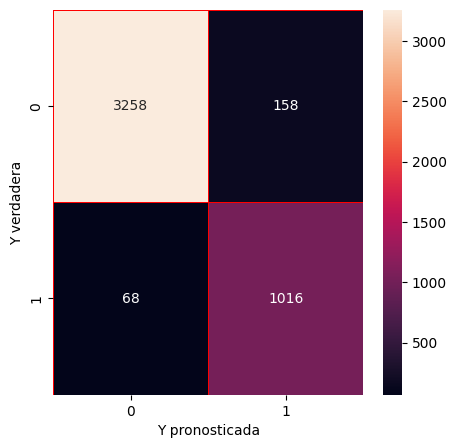

In [38]:
# Visualizacion de la matriz de confunsion
import seaborn as sns # importamos la libreria seaborn
f, ax = plt.subplots(figsize =(5,5)) # Creamos la figura 

sns.heatmap(cm, annot=True, linewidths=0.5, linecolor='red', fmt='.0f', ax=ax)
# annot=True Indica que se mostraran los valores en cada celda
# Linewidths=0.5 indica el anchon de las lineas 
# fmt='0.f' indica que los valores seran enteros
# ax=ax indica que se mostraran en la figura ax
plt.xlabel('Y pronosticada')
plt.ylabel('Y verdadera')
plt.show()

In [39]:
correctos = cm[0,0] + cm[1,1] # Sumamos los valores correctos
incorrectos = cm[0,1] + cm[1,0] # Sumamos los valores incorrectos
presicionglobal = correctos / (correctos + incorrectos)
presicionglobal

0.9497777777777778

In [40]:
# Esto es para saber que tan buenos somo pronosticando loS 'SI'

presicionbenigno = cm[0,0] / (cm[0,0] + cm[1,0])
presicionbenigno

0.9795550210463019

In [41]:
# Esto es para saber que tan buenos somoS proosticando los 'NO'
presicionMaligno = cm[1,1] / (cm[1,1] + cm[0,1])
presicionMaligno

0.8654173764906303

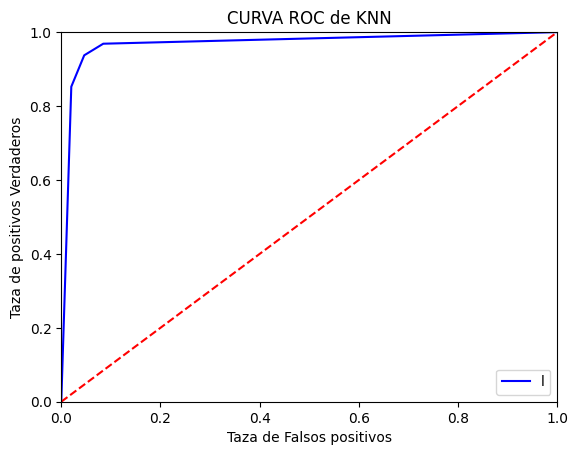

In [42]:
from sklearn.metrics import roc_curve # Importamos la curva de Operacion o la Roc curve
from sklearn.metrics import auc  # Area bajo la curva 

y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:,1]) 
# FPR = False positive rate
# tpr = True positivos rate
roc_auc = auc(fpr, tpr) # Calculamos el area bajo la curva

# Graficacion de la curva roc
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,'b', label='AUC = %0.2f' % roc_auc)   # %0.2f (formato a 2 decimales)
plt.legend('loc = lower rigth ')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1]) # Limites de grafico
plt.ylim([0,1]) # Limites de grafico 
plt.ylabel('Taza de positivos Verdaderos')
plt.xlabel('Taza de Falsos positivos')
plt.title('CURVA ROC de KNN')
plt.show()